<a href="https://colab.research.google.com/github/kimberlyydanij/python_demo/blob/master/python_25_naver_movie_review_wordcloud_story_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 워드클라우드와 텍스트 마이닝

### colab 한글화

In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

### jpype 설치

In [2]:
#https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
#아래부분 바로 실행하면 jpype설치 됨
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# https://konlpy.org/ko/latest/

In [3]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python_demo


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

## 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [6]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

### 데이터 가져오기

In [8]:
#utf-8 codec can't decode byte 0xb9 in position 0: invalid start byte
df = pd.read_csv('data_crowing/movie_reviews.csv', encoding='UTF-8')
df.head()

,Unnamed: 0,title,story,genre,genre_code
0,0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,['액션'],[0]
1,1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"['공연실황', '다큐멘터리']","[7, 6]"
2,2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"['애니메이션', '코미디', '가족']","[1, 11, 14]"
3,3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,['다큐멘터리'],[6]
4,4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"['다큐멘터리', '드라마']","[6, 2]"


### 명사단어 추출

### 1. 세종사전 실행

In [9]:
from konlpy.tag import Okt
twitter = Okt()

2. 단어 리스트 만들기기

In [11]:
word_list = []
word_list = df['story']

### 3. 형태소 분리 및 품사 태깅

In [12]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('인피니티', 'Noun'), ('워', 'Noun'), ('이후', 'Noun'), ('절반', 'Noun'), ('만', 'Josa'), ('살아남은', 'Verb'), ('지구', 'Noun'), ('\xa0', 'Foreign'), ('마지막', 'Noun'), ('희망이', 'Noun'), ('된', 'Verb'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('먼저', 'Noun'), ('떠난', 'Verb'), ('그', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위해', 'Noun'), ('모든', 'Noun'), ('것', 'Noun'), ('을', 'Josa'), ('걸었다', 'Verb'), ('\xa0\xa0', 'Foreign'), ('위대한', 'Adjective'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('운명', 'Noun'), ('을', 'Josa'), ('바꿀', 'Verb'), ('최후', 'Noun'), ('의', 'Josa'), ('전쟁', 'Noun'), ('이', 'Josa'), ('펼쳐진다', 'Verb')]


### 4.명사만 추출

In [13]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [ ]:
noun_list

### 5. 명사가 두문자 이상만 추출

In [16]:
len(noun_list)
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['학기', '먼지', '책상', '먼지', '대학교', '도서관', '재건축', '개인', '스터디', '공간']

### 6. 단어 카운트

In [ ]:
counts = Counter(noun_list)
tags = counts.most_common(30)
print(len(tags))
tags

### WordCloud생성

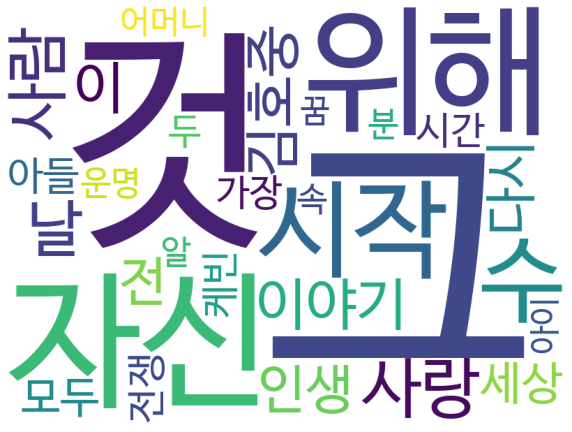

In [16]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()